# Exploratory Data Analysis 

From the information we previosly obtained, now we need to take a look into all this information and take out what we consider not usefull

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from roleidentification import pull_data, get_roles
import requests
import json

In [2]:
raw_df= pd.read_csv('./raw.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 291 entries, Unnamed: 0 to challenges.hadAfkTeammate
dtypes: bool(9), float64(39), int64(231), object(12)
memory usage: 21.6+ MB


In [3]:
raw_df.head()

,Unnamed: 0,allInPings,assistMePings,assists,baronKills,basicPings,bountyLevel,champExperience,champLevel,championId,...,challenges.junglerKillsEarlyJungle,challenges.killsOnLanersEarlyJungleAsJungler,challenges.fasterSupportQuestCompletion,challenges.highestWardKills,challenges.baronBuffGoldAdvantageOverThreshold,challenges.earliestBaron,challenges.teleportTakedowns,challenges.earliestElderDragon,challenges.fastestLegendary,challenges.hadAfkTeammate
0,0,0,0,38,0,0,21,36216,18,901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,30,0,0,19,31144,18,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,0,37,0,0,11,27776,18,136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,1,34,0,0,14,30905,18,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,1,46,0,0,14,36668,18,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
headers = raw_df.columns.tolist()
raw_df = raw_df[raw_df['queu_Id']==420]
raw_df = raw_df[raw_df['teamEarlySurrendered']==False]
raw_df['championId'] = raw_df['championId'].astype(str)

Now, lets get the position that each champ was played in using the statistics of the most recent patch. The information already included in the DF created is missing 25%, so it can create problems in the future

In [5]:
url = "https://cdn.merakianalytics.com/riot/lol/resources/latest/en-US/championrates.json"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print(f"Failed to retrieve data: {response.status_code}")

result = {key: max(value, key=lambda x: value[x]['playRate']) for key, value in data['data'].items()}
raw_df['Position'] = raw_df['championId'].map(lambda x: result.get(x, None))


Lets break down the information into 2 different data frame for the time beign, the first one is the communications DF and the second one is the game stats DF

In [6]:
# First, lets start with a communication DF, this shall include all the columns that
#  include ping in the name, since it's soloQ, there's no voice chat to communicate
#  through, so this means Pings are the main form of quick communication

comms_list=[item for item in headers if 'ping' in item.lower() ]
comms_df=raw_df[comms_list]
comms_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   allInPings          9855 non-null   int64
 1   assistMePings       9855 non-null   int64
 2   basicPings          9855 non-null   int64
 3   commandPings        9855 non-null   int64
 4   dangerPings         9855 non-null   int64
 5   enemyMissingPings   9855 non-null   int64
 6   enemyVisionPings    9855 non-null   int64
 7   getBackPings        9855 non-null   int64
 8   holdPings           9855 non-null   int64
 9   needVisionPings     9855 non-null   int64
 10  onMyWayPings        9855 non-null   int64
 11  pushPings           9855 non-null   int64
 12  retreatPings        9855 non-null   int64
 13  visionClearedPings  9855 non-null   int64
dtypes: int64(14)
memory usage: 1.1 MB


In [7]:
# lets do the same for the in game statistics, however, this time it must be done one by one,
#  since we need to check all the info to select what will be usefull

game_stats_df= raw_df.drop(columns=['Unnamed: 0',
'allInPings',
'assistMePings',
'basicPings',
'commandPings',
'dangerPings',
'eligibleForProgression',
'enemyMissingPings',
'enemyVisionPings',
'getBackPings',
'holdPings',
'item0',
'item1',
'item2',
'item3',
'item4',
'item5',
'item6',
'itemsPurchased',
'needVisionPings',
'onMyWayPings',
'placement',
'playerAugment1',
'playerAugment2',
'playerAugment3',
'playerAugment4',
'playerAugment5',
'playerAugment6',
'playerSubteamId',
'profileIcon',
'pushPings',
'retreatPings',
'subteamPlacement',
'summonerId',
'summonerLevel',
'summonerName',
'unrealKills',
'visionClearedPings',
'challenges.12AssistStreakCount',
'challenges.SWARM_DefeatAatrox',
'challenges.SWARM_DefeatBriar',
'challenges.SWARM_DefeatMiniBosses',
'challenges.SWARM_EvolveWeapon',
'challenges.SWARM_Have3Passives',
'challenges.SWARM_KillEnemy',
'challenges.SWARM_PickupGold',
'challenges.SWARM_ReachLevel50',
'challenges.SWARM_Survive15Min',
'challenges.SWARM_WinWith5EvolvedWeapons',
'challenges.acesBefore15Minutes',
'challenges.baronTakedowns',
'challenges.blastConeOppositeOpponentCount',
'challenges.bountyGold',
'challenges.buffsStolen',
'challenges.completeSupportQuestInTime',
'challenges.dancedWithRiftHerald',
'challenges.deathsByEnemyChamps',
'challenges.dodgeSkillShotsSmallWindow',
'challenges.doubleAces',
'challenges.dragonTakedowns',
'challenges.earlyLaningPhaseGoldExpAdvantage',
'challenges.elderDragonKillsWithOpposingSoul',
'challenges.elderDragonMultikills',
'challenges.epicMonsterKillsNearEnemyJungler',
'challenges.epicMonsterKillsWithin30SecondsOfSpawn',
'challenges.epicMonsterSteals',
'challenges.epicMonsterStolenWithoutSmite',
'challenges.fistBumpParticipation',
'challenges.flawlessAces',
'challenges.getTakedownsInAllLanesEarlyJungleAsLaner',
'challenges.hadOpenNexus',
'challenges.immobilizeAndKillWithAlly',
'challenges.junglerTakedownsNearDamagedEpicMonster',
'challenges.killAfterHiddenWithAlly',
'challenges.killedChampTookFullTeamDamageSurvived',
'challenges.killsOnOtherLanesEarlyJungleAsLaner',
'challenges.killsOnRecentlyHealedByAramPack',
'challenges.killsUnderOwnTurret',
'challenges.killsWithHelpFromEpicMonster',
'challenges.knockEnemyIntoTeamAndKill',
'challenges.landSkillShotsEarlyGame',
'challenges.laningPhaseGoldExpAdvantage',
'challenges.legendaryCount',
'challenges.legendaryItemUsed',
'challenges.maxCsAdvantageOnLaneOpponent',
'challenges.maxKillDeficit',
'challenges.maxLevelLeadLaneOpponent',
'challenges.mejaisFullStackInTime',
'challenges.moreEnemyJungleThanOpponent',
'challenges.multiKillOneSpell',
'challenges.multiTurretRiftHeraldCount',
'challenges.multikills',
'challenges.multikillsAfterAggressiveFlash',
'challenges.outerTurretExecutesBefore10Minutes',
'challenges.outnumberedKills',
'challenges.outnumberedNexusKill',
'challenges.perfectDragonSoulsTaken',
'challenges.perfectGame',
'challenges.pickKillWithAlly',
'challenges.playedChampSelectPosition',
'challenges.poroExplosions',
'challenges.quickCleanse',
'challenges.quickFirstTurret',
'challenges.quickSoloKills',
'challenges.riftHeraldTakedowns',
'challenges.saveAllyFromDeath',
'challenges.scuttleCrabKills',
'challenges.skillshotsDodged',
'challenges.skillshotsHit',
'challenges.snowballsHit',
'challenges.soloBaronKills',
'challenges.soloKills',
'challenges.survivedSingleDigitHpCount',
'challenges.survivedThreeImmobilizesInFight',
'challenges.takedownOnFirstTurret',
'challenges.takedowns',
'challenges.takedownsBeforeJungleMinionSpawn',
'challenges.takedownsFirstXMinutes',
'challenges.takedownsInAlcove',
'challenges.takedownsInEnemyFountain',
'challenges.teamBaronKills',
'challenges.teamDamagePercentage',
'challenges.tookLargeDamageSurvived',
'challenges.twentyMinionsIn3SecondsCount',
'challenges.twoWardsOneSweeperCount',
'challenges.unseenRecalls',
'challenges.visionScoreAdvantageLaneOpponent',
'challenges.wardTakedownsBefore20M',
'challenges.wardsGuarded',
'missions.playerScore0',
'missions.playerScore1',
'missions.playerScore2',
'missions.playerScore3',
'missions.playerScore4',
'missions.playerScore5',
'missions.playerScore6',
'missions.playerScore7',
'missions.playerScore8',
'missions.playerScore9',
'missions.playerScore10',
'missions.playerScore11',
'perks.statPerks.defense',
'perks.statPerks.flex',
'perks.statPerks.offense',
'perks.styles',
'challenges.junglerKillsEarlyJungle',
'challenges.killsOnLanersEarlyJungleAsJungler',
'challenges.fasterSupportQuestCompletion',
'challenges.earliestBaron',
'challenges.shortestTimeToAceFromFirstTakedown',
'challenges.highestChampionDamage',
'challenges.highestCrowdControlScore',
'challenges.fastestLegendary',
'challenges.baronBuffGoldAdvantageOverThreshold',
'challenges.teleportTakedowns',
'challenges.hadAfkTeammate',
'challenges.thirdInhibitorDestroyedTime',
'challenges.earliestElderDragon',
'puuid',
'riotIdGameName',
'riotIdTagline',
'role', 
'participantId',
'challenges.highestWardKills',
'challenges.firstTurretKilledTime',
'challenges.controlWardTimeCoverageInRiverOrEnemyHalf',
'challenges.soloTurretsLategame',
'challenges.earliestDragonTakedown',
'queu_Id',
'individualPosition',
'lane',
'spell1Casts',
'spell2Casts',
'spell3Casts',
'spell4Casts',
'summoner1Casts',
'summoner1Id',
'summoner2Casts',
'summoner2Id',
'teamId',
'teamPosition',
'teamEarlySurrendered',
'challenges.abilityUses', 
'championId',
'championName'















 ], axis=1)
game_stats_df.rename(columns=lambda x: x.replace('challenges.', '') if x.startswith('challenges.') else x, inplace=True)


In [8]:
game_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 0 to 9999
Columns: 107 entries, assists to Position
dtypes: bool(7), float64(10), int64(89), object(1)
memory usage: 7.7+ MB


In [9]:
game_stats_df

,assists,baronKills,bountyLevel,champExperience,champLevel,championTransform,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,...,takedownsAfterGainingLevelAdvantage,teamElderDragonKills,teamRiftHeraldKills,turretPlatesTaken,turretTakedowns,turretsTakenWithRiftHerald,visionScorePerMinute,voidMonsterKill,wardTakedowns,Position
0,38,0,21,36216,18,0,3,686,686,686,...,0,0,0,0,1,0,0.000000,0,0,BOTTOM
1,30,0,19,31144,18,0,3,2865,2865,2865,...,0,0,0,0,3,0,0.000000,0,0,TOP
2,37,0,11,27776,18,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,0,MIDDLE
3,34,0,14,30905,18,0,4,6911,6911,6911,...,0,0,0,0,4,0,0.000000,0,0,TOP
4,46,0,14,36668,18,0,4,1035,1035,1035,...,0,0,0,0,1,0,0.000000,0,0,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8,0,9,15159,16,0,1,18168,22558,18168,...,0,0,0,5,7,0,0.655816,1,3,TOP
9996,6,1,6,13787,15,0,1,1387,25666,1387,...,0,0,0,0,0,0,0.817824,7,4,JUNGLE
9997,4,0,7,13769,15,0,8,2018,3023,2018,...,0,0,0,2,0,0,0.723521,0,3,MIDDLE
9998,9,0,7,10175,13,0,3,851,9550,851,...,0,0,0,0,2,0,0.820061,1,6,BOTTOM


# Data Prep

Now that the EDA is complete we can start with the data prep step. Some fields have missign values or have boolean values, so I need to take care of this. 

In [10]:
#First, lets convert all boolean data types

game_stats_df = game_stats_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
game_stats_df['killParticipation']=game_stats_df['killParticipation'].fillna(0)
game_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 0 to 9999
Columns: 107 entries, assists to Position
dtypes: float64(10), int64(96), object(1)
memory usage: 8.1+ MB


In [38]:
game_stats_df

,assists,baronKills,bountyLevel,champExperience,champLevel,championTransform,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,...,takedownsAfterGainingLevelAdvantage,teamElderDragonKills,teamRiftHeraldKills,turretPlatesTaken,turretTakedowns,turretsTakenWithRiftHerald,visionScorePerMinute,voidMonsterKill,wardTakedowns,Position
0,38,0,21,36216,18,0,3,686,686,686,...,0,0,0,0,1,0,0.000000,0,0,BOTTOM
1,30,0,19,31144,18,0,3,2865,2865,2865,...,0,0,0,0,3,0,0.000000,0,0,TOP
2,37,0,11,27776,18,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,0,MIDDLE
3,34,0,14,30905,18,0,4,6911,6911,6911,...,0,0,0,0,4,0,0.000000,0,0,TOP
4,46,0,14,36668,18,0,4,1035,1035,1035,...,0,0,0,0,1,0,0.000000,0,0,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8,0,9,15159,16,0,1,18168,22558,18168,...,0,0,0,5,7,0,0.655816,1,3,TOP
9996,6,1,6,13787,15,0,1,1387,25666,1387,...,0,0,0,0,0,0,0.817824,7,4,JUNGLE
9997,4,0,7,13769,15,0,8,2018,3023,2018,...,0,0,0,2,0,0,0.723521,0,3,MIDDLE
9998,9,0,7,10175,13,0,3,851,9550,851,...,0,0,0,0,2,0,0.820061,1,6,BOTTOM


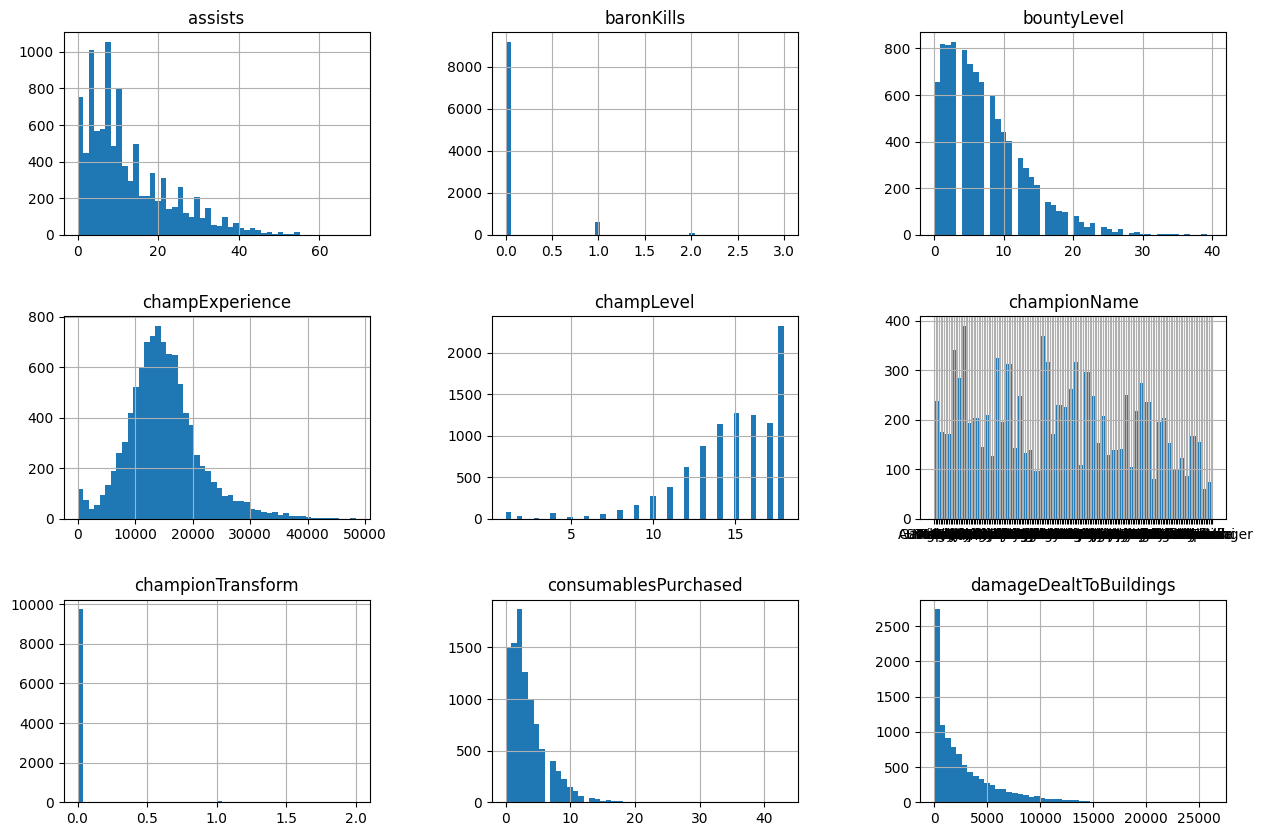

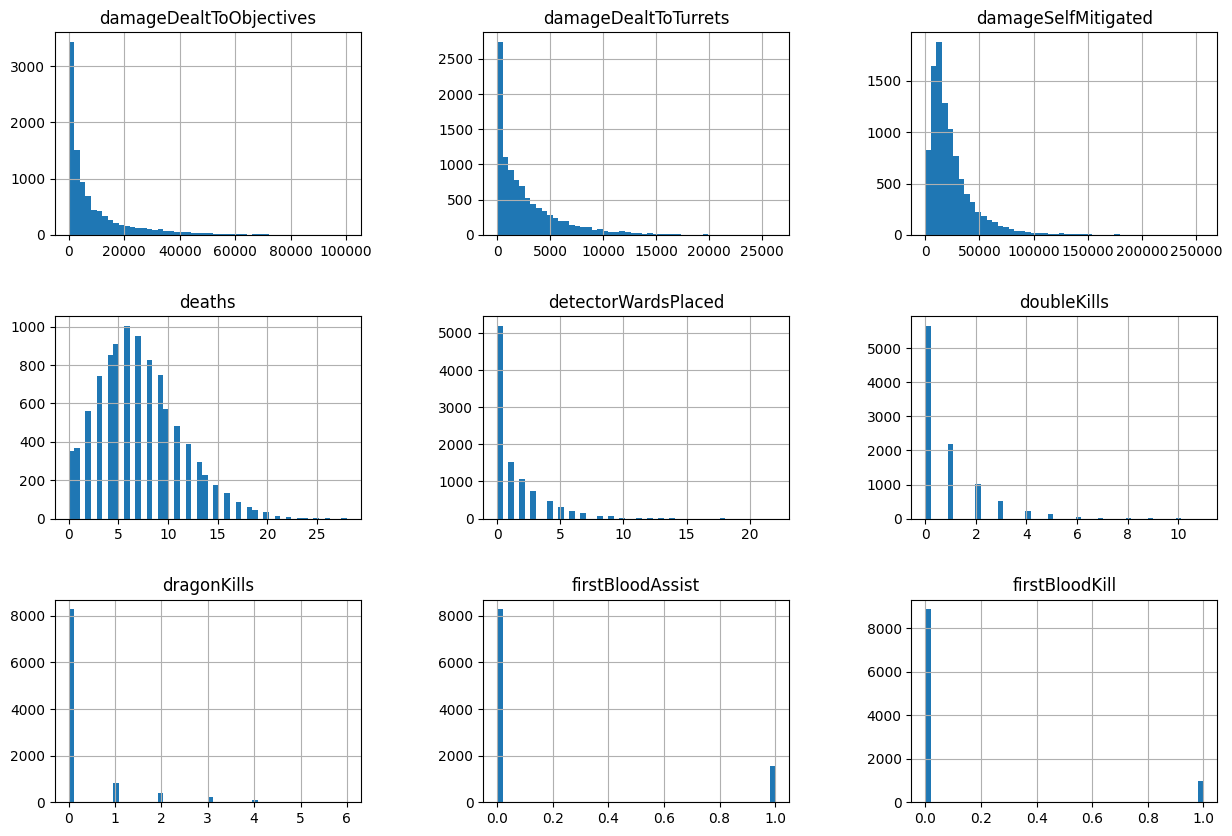

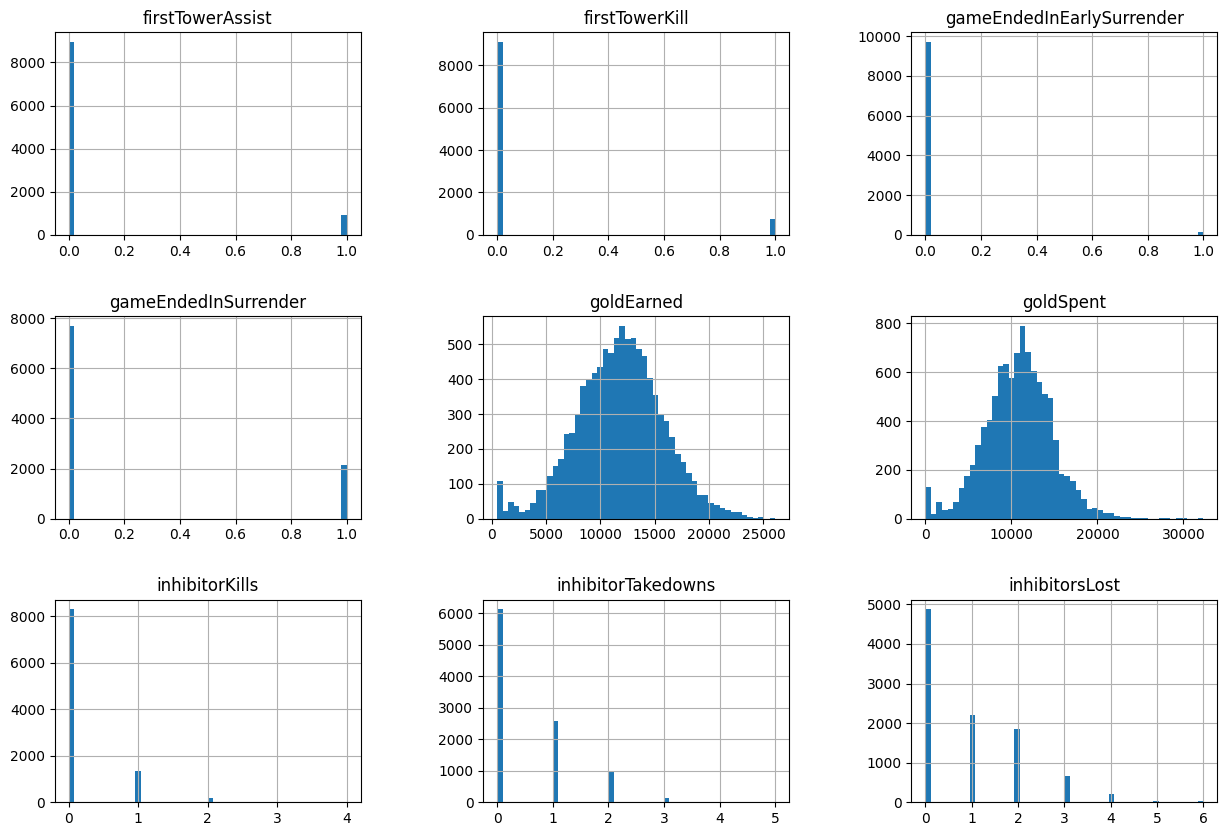

C:\Users\cfuen\AppData\Local\Temp\ipykernel_11512\878939301.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  game_stats_df[col].hist(bins=50, ax=axes[j])


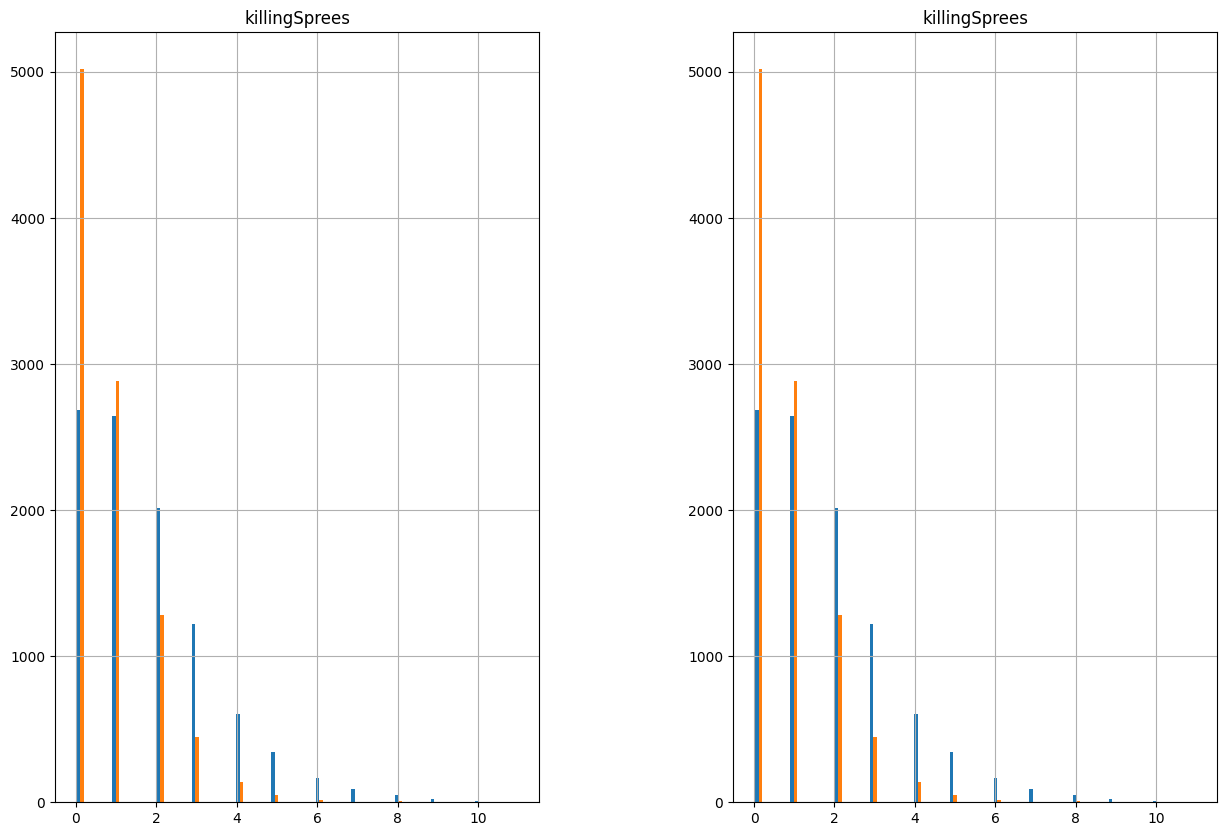

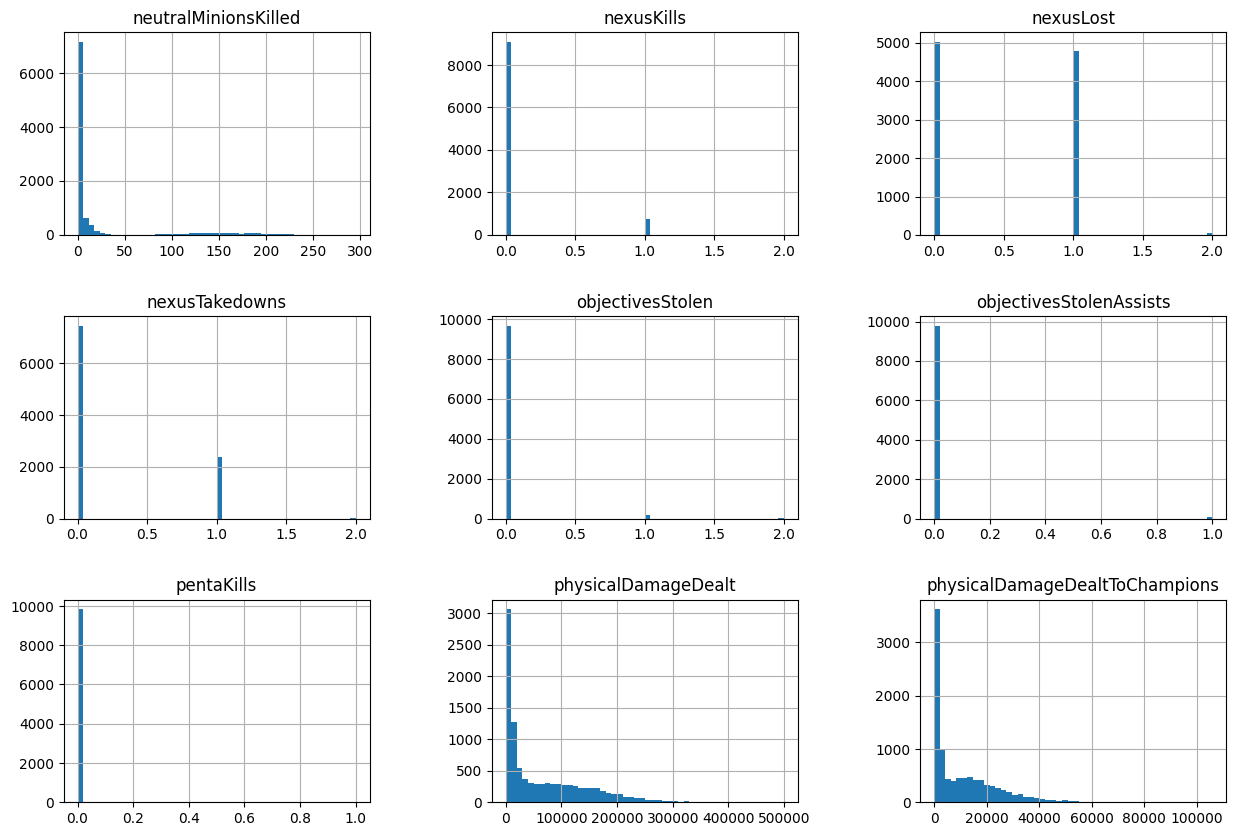

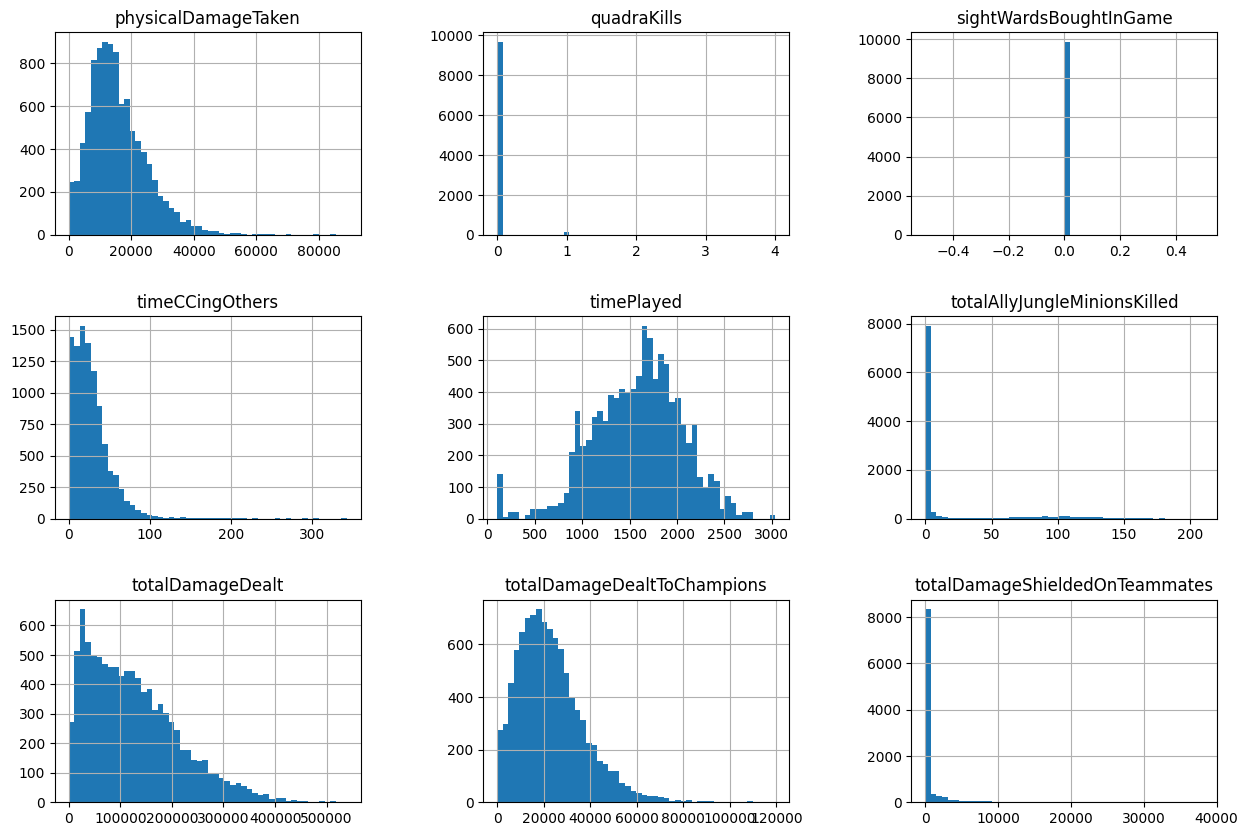

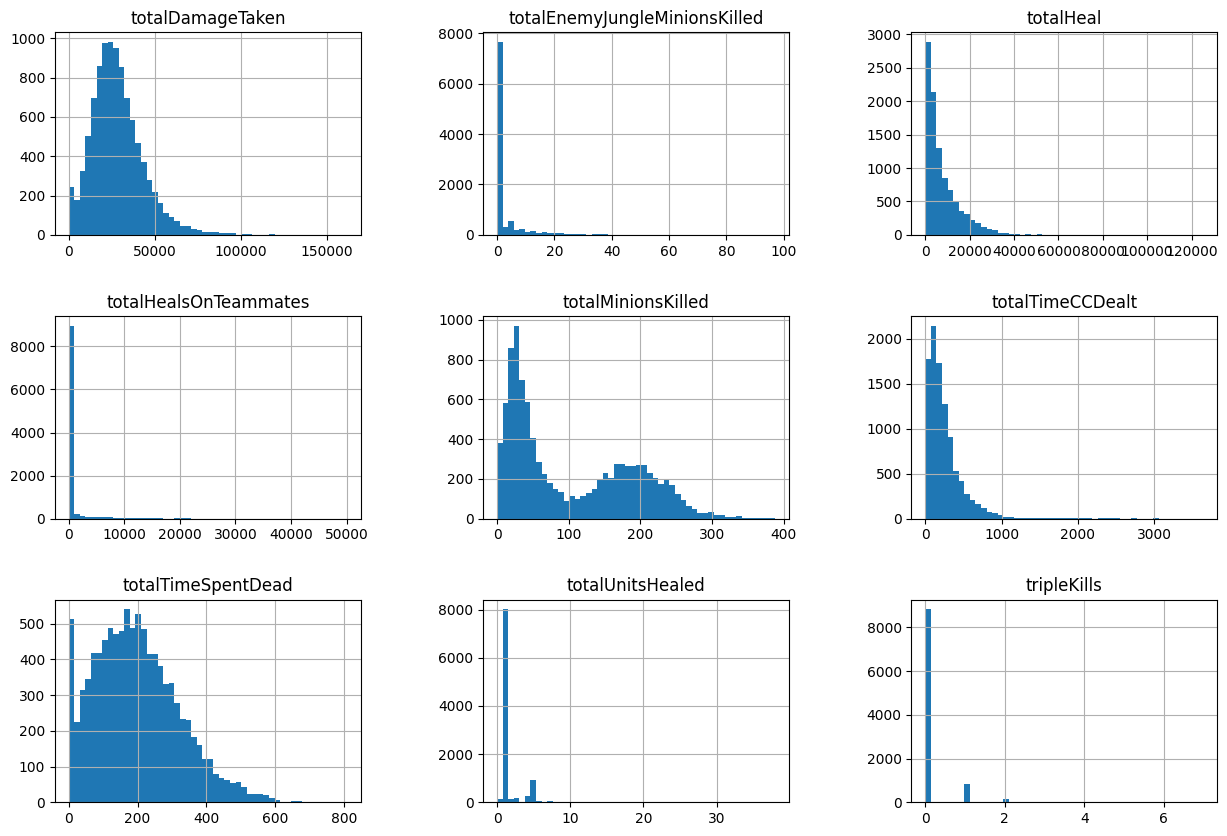

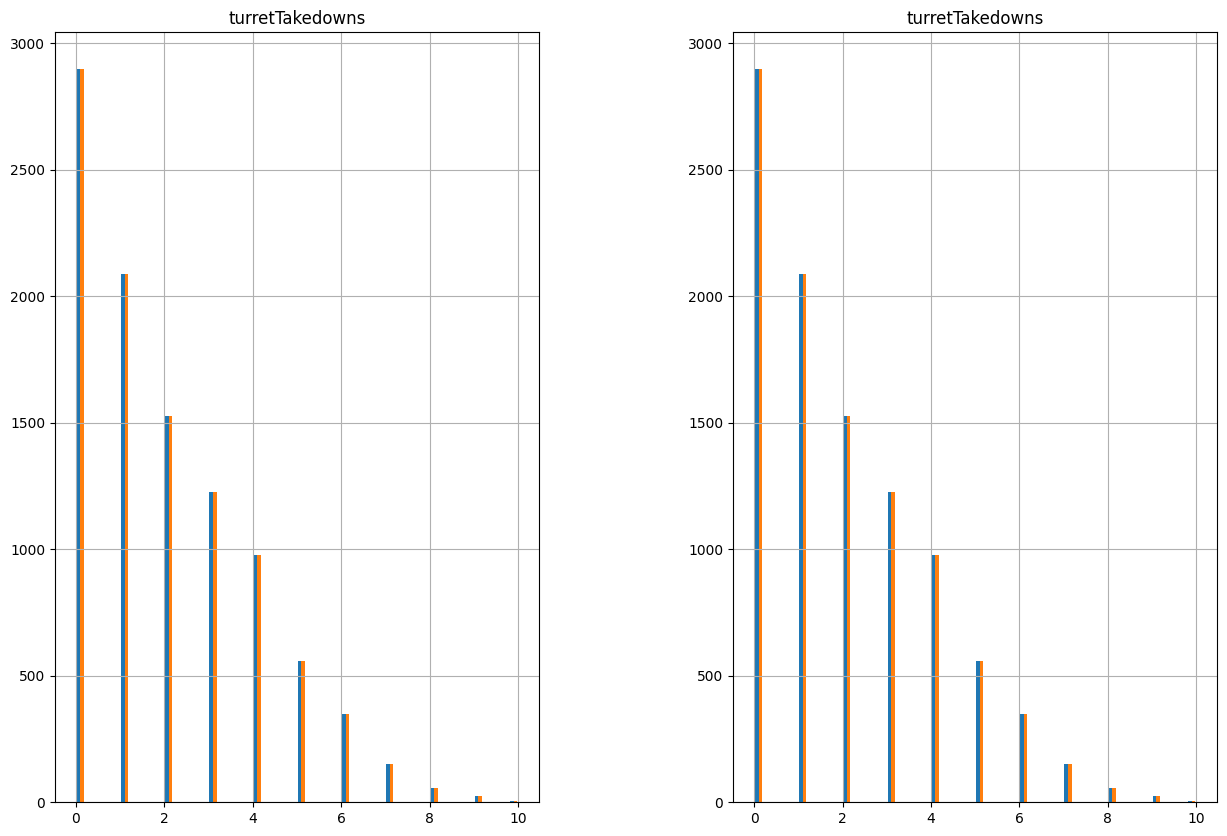

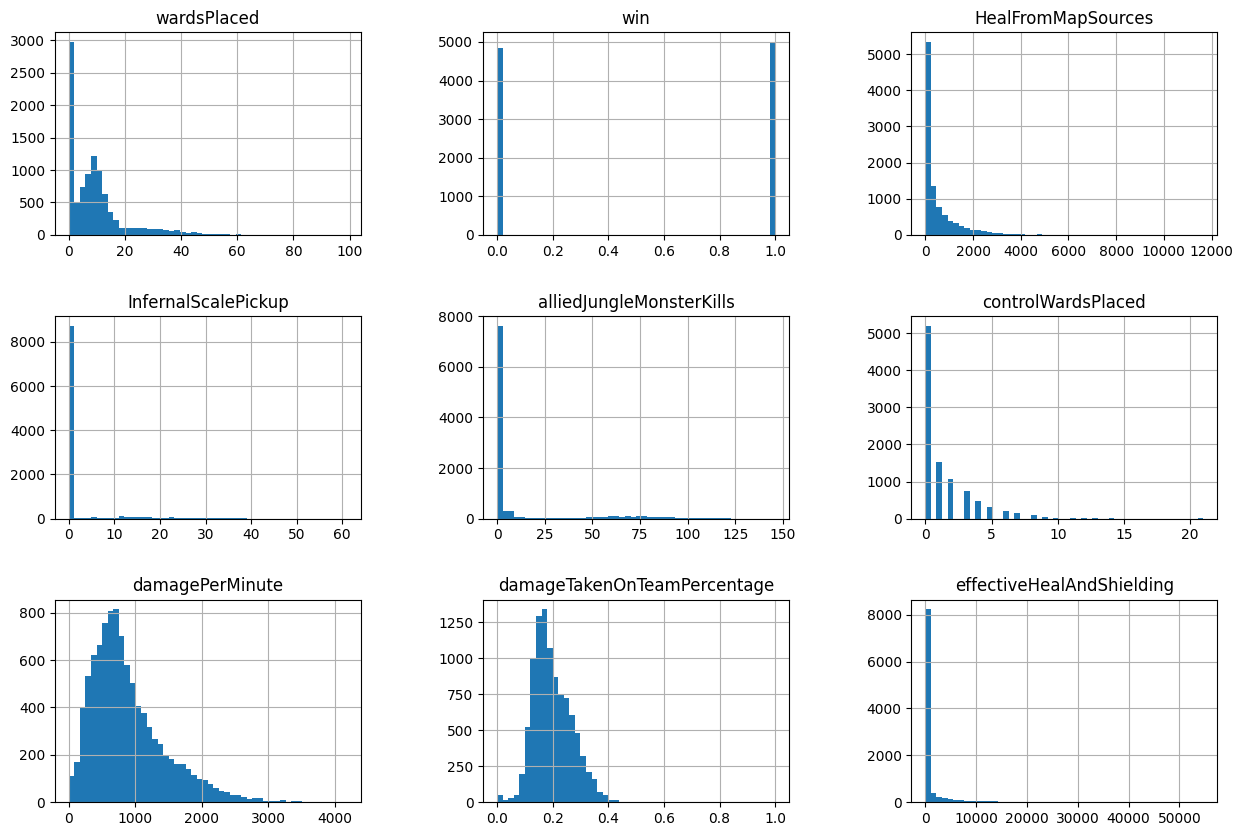

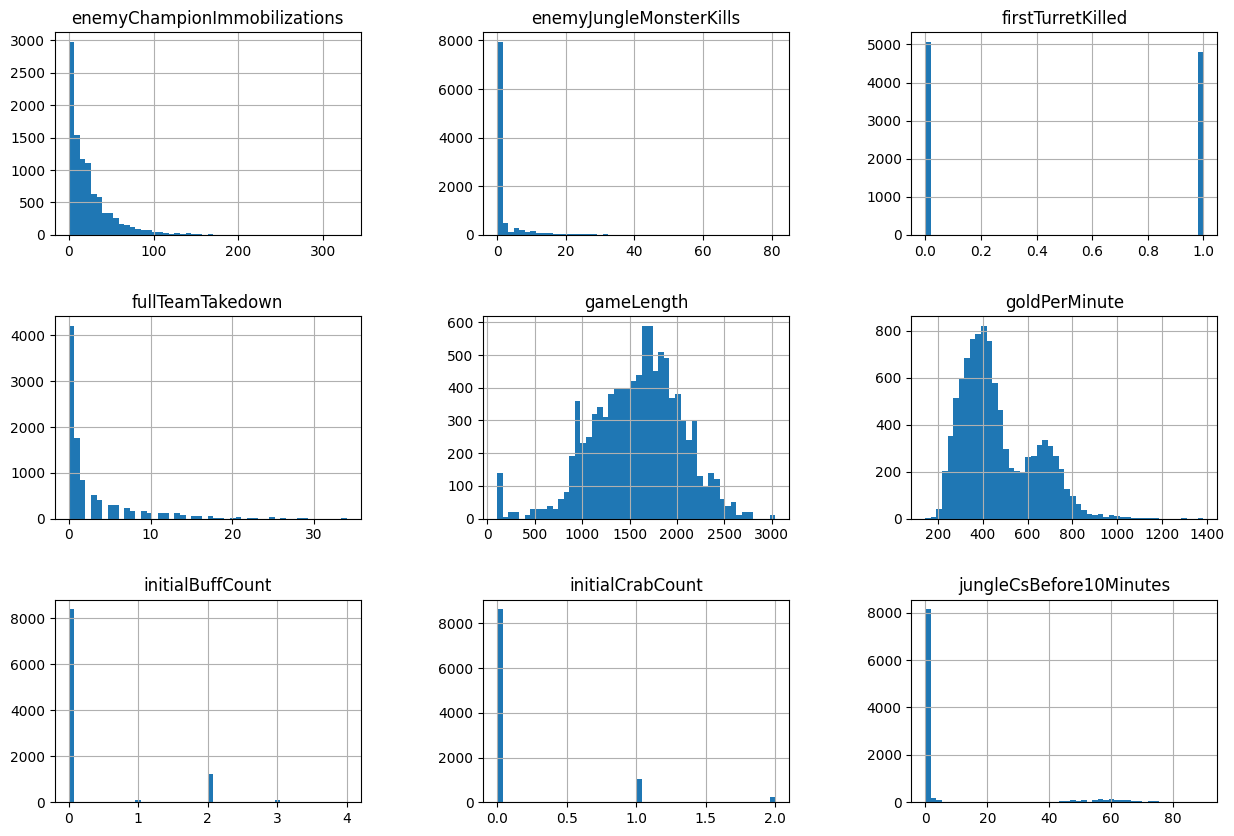

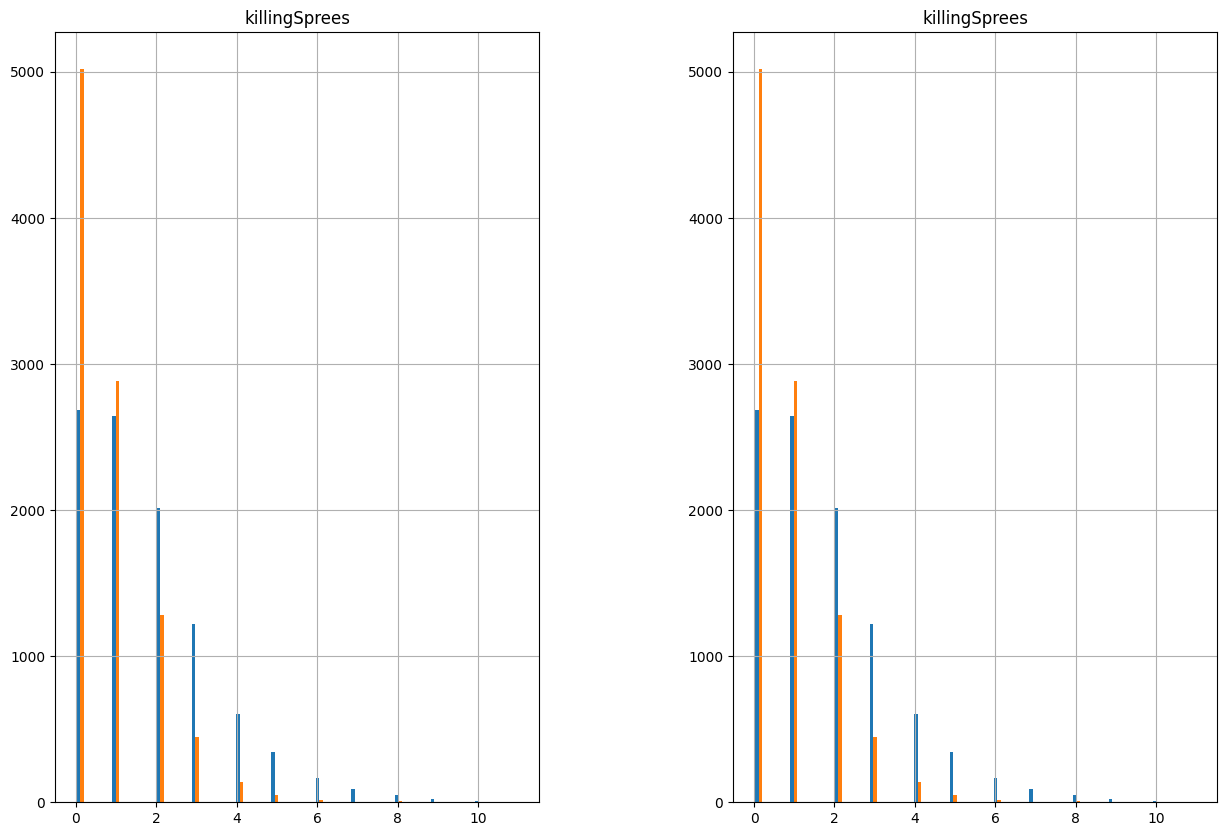

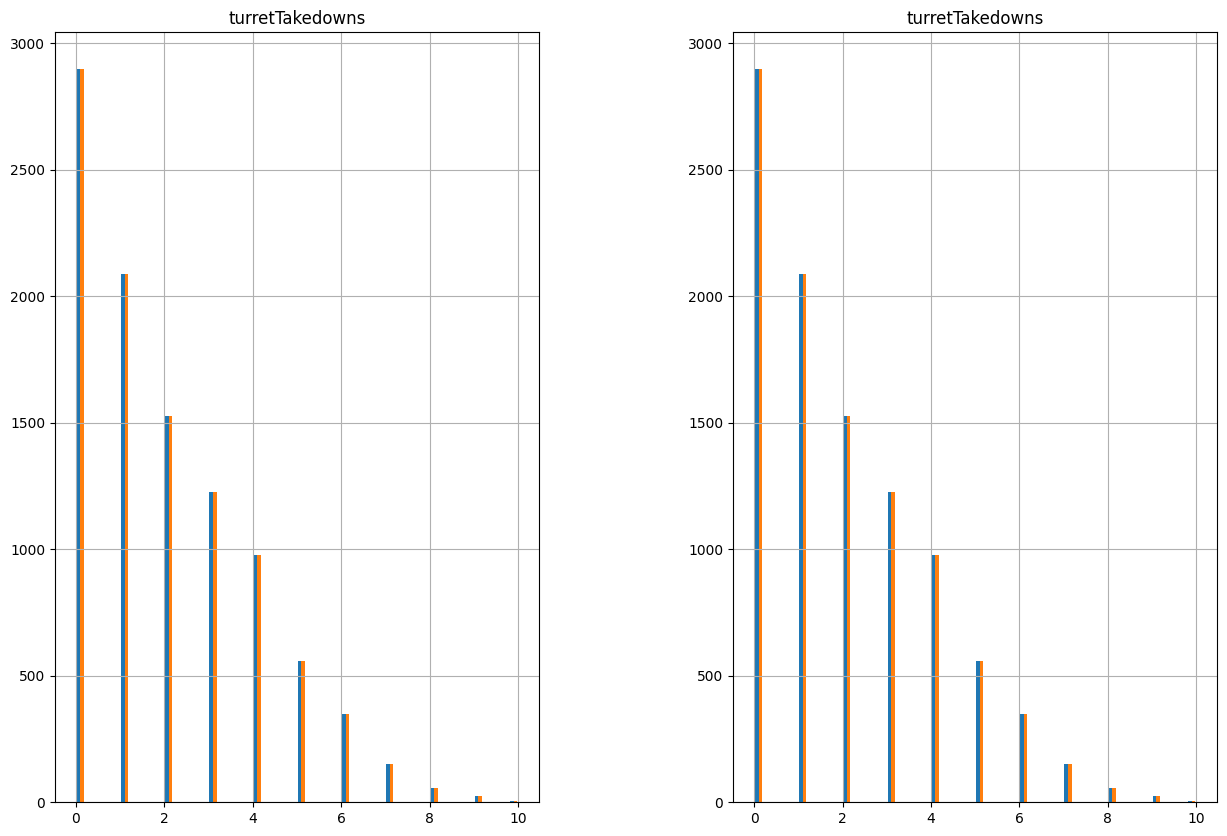

In [22]:
num_columns = 3  
num_rows = 3     


num_total_cols = len(game_stats_df.columns)

for i in range(0, num_total_cols, num_columns * num_rows):
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
    axes = axes.flatten()  
    
    for j, col in enumerate(game_stats_df.columns[i:i + num_columns * num_rows]):
        game_stats_df[col].hist(bins=50, ax=axes[j])
        axes[j].set_title(col)

    for j in range(len(game_stats_df.columns[i:i + num_columns * num_rows]), len(axes)):
        axes[j].axis('off')

    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()


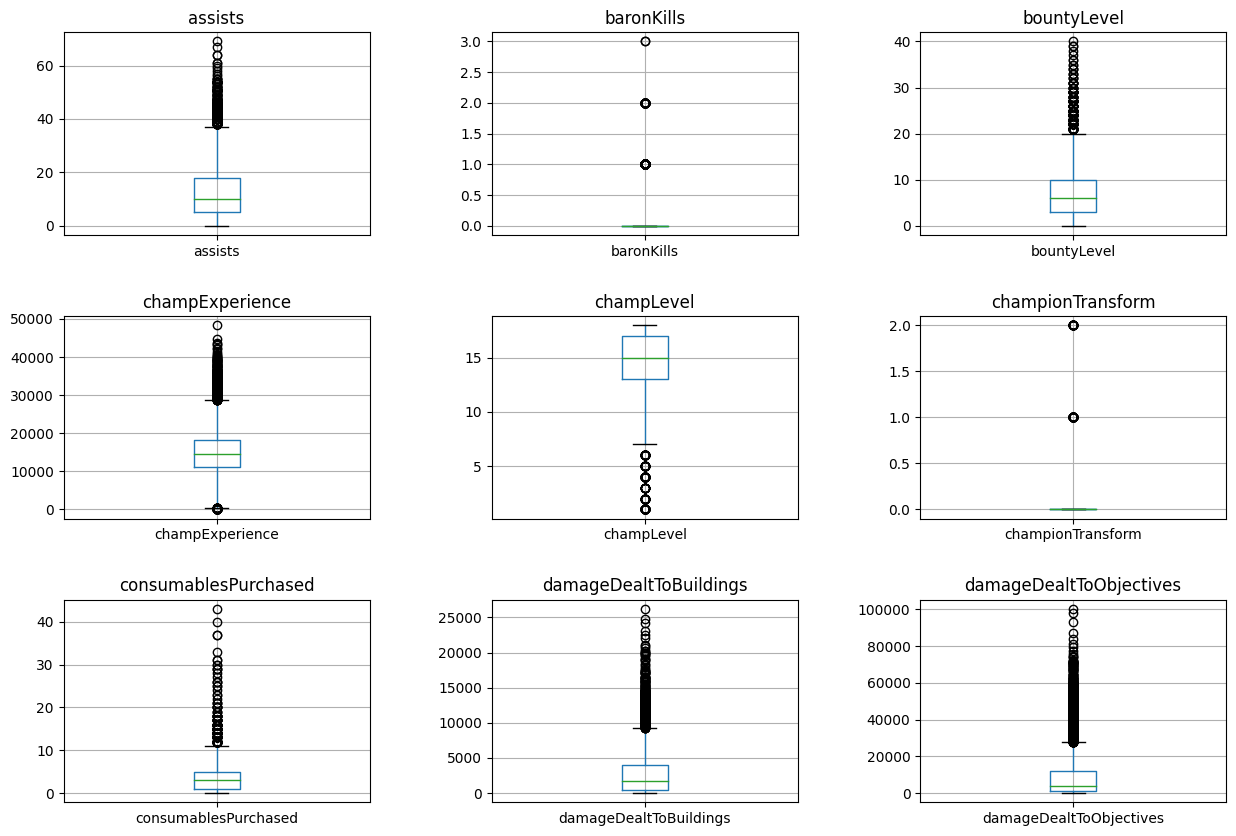

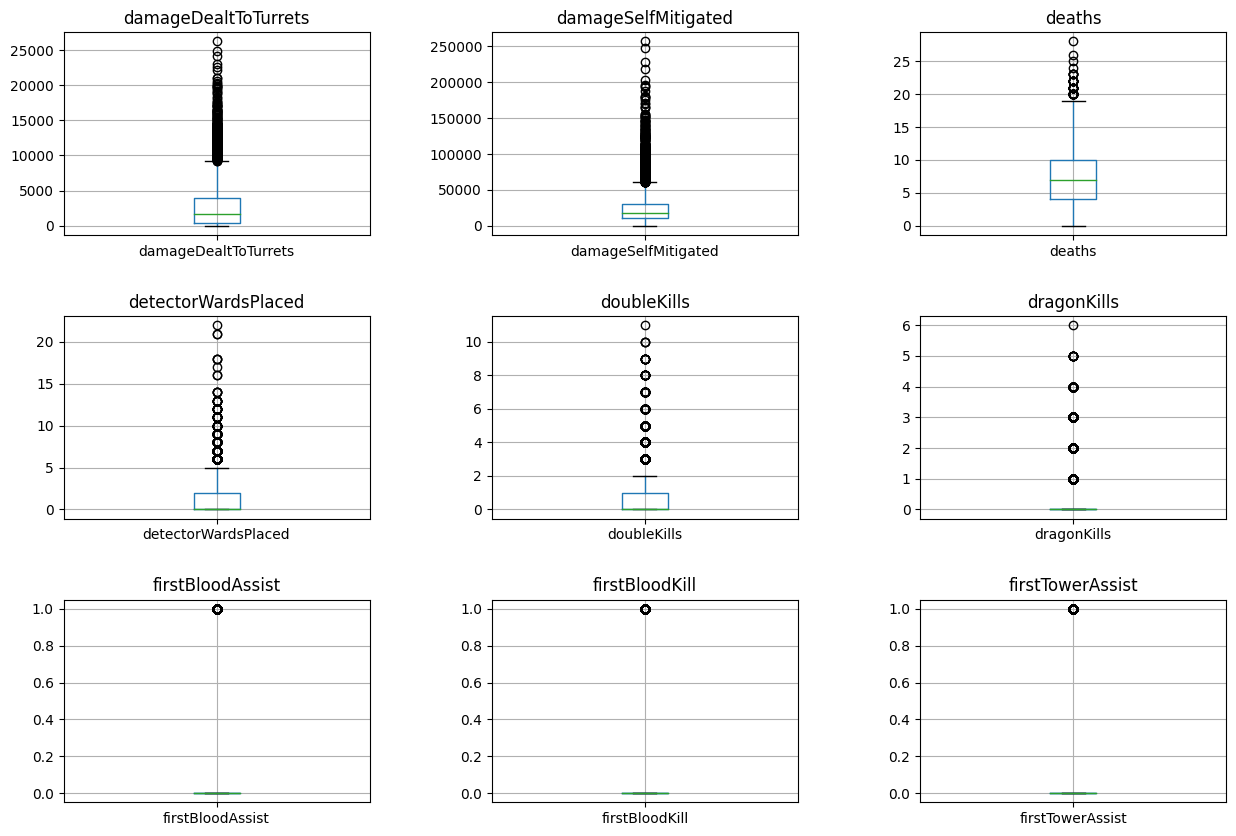

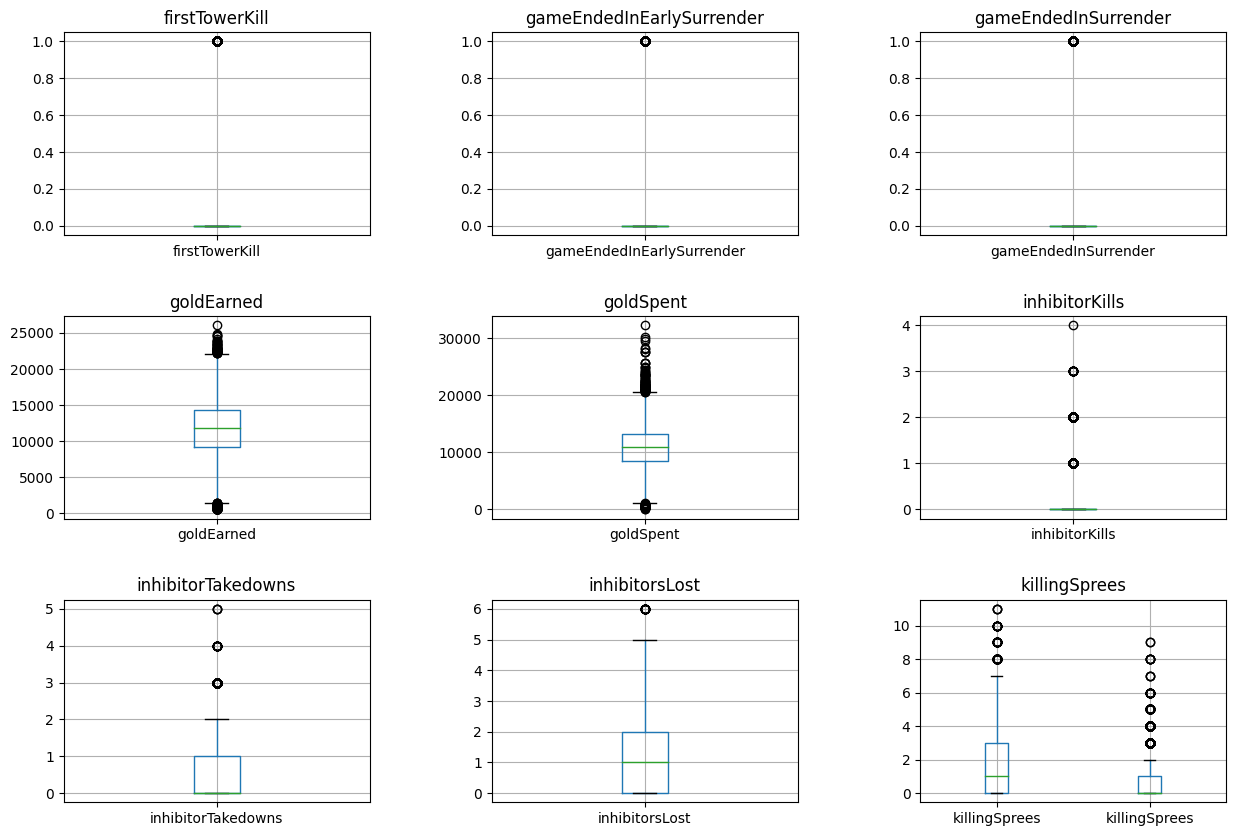

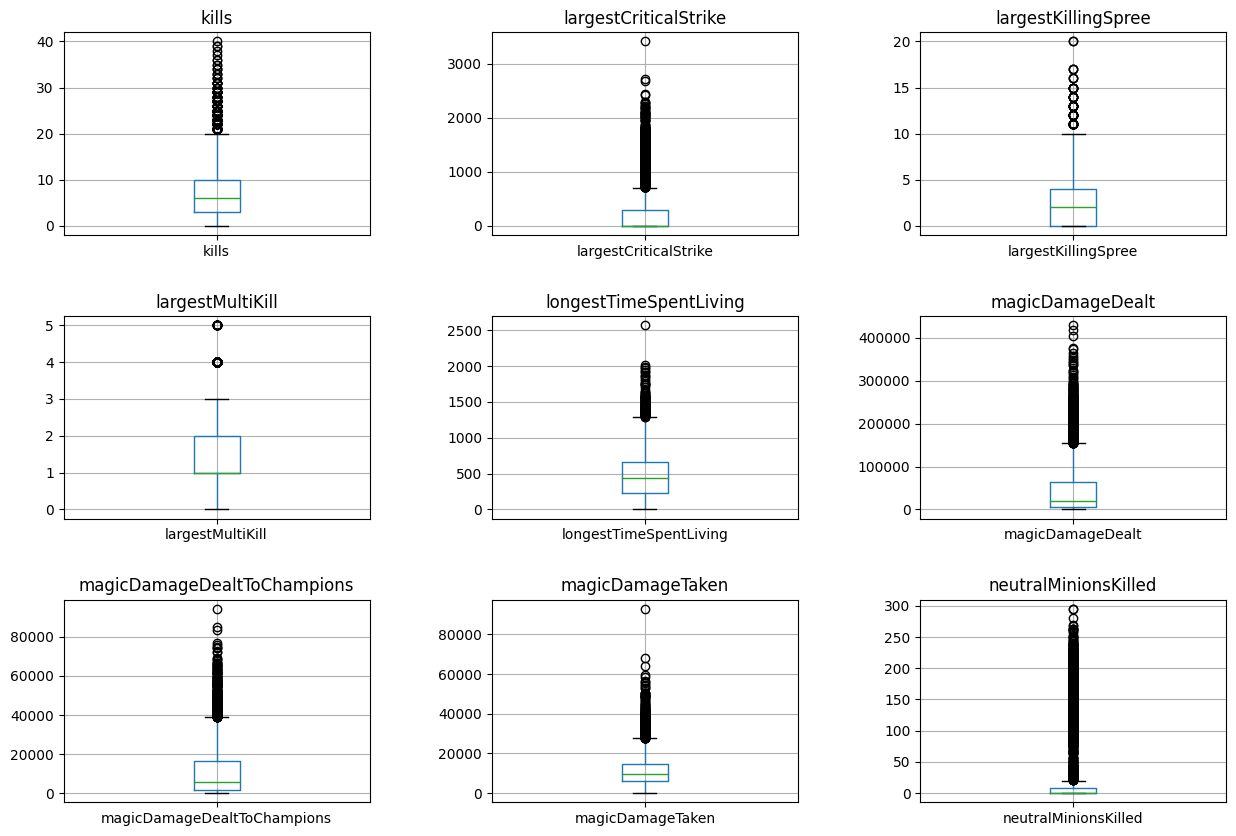

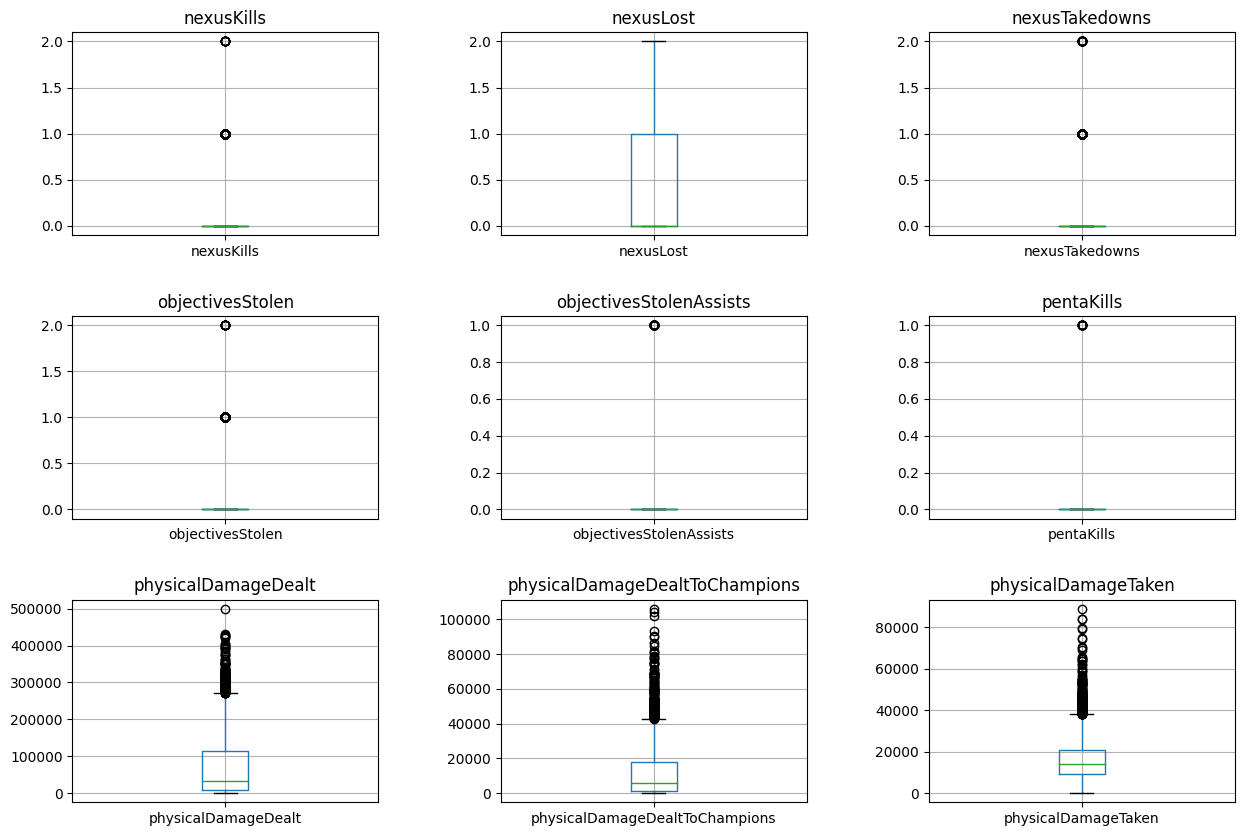

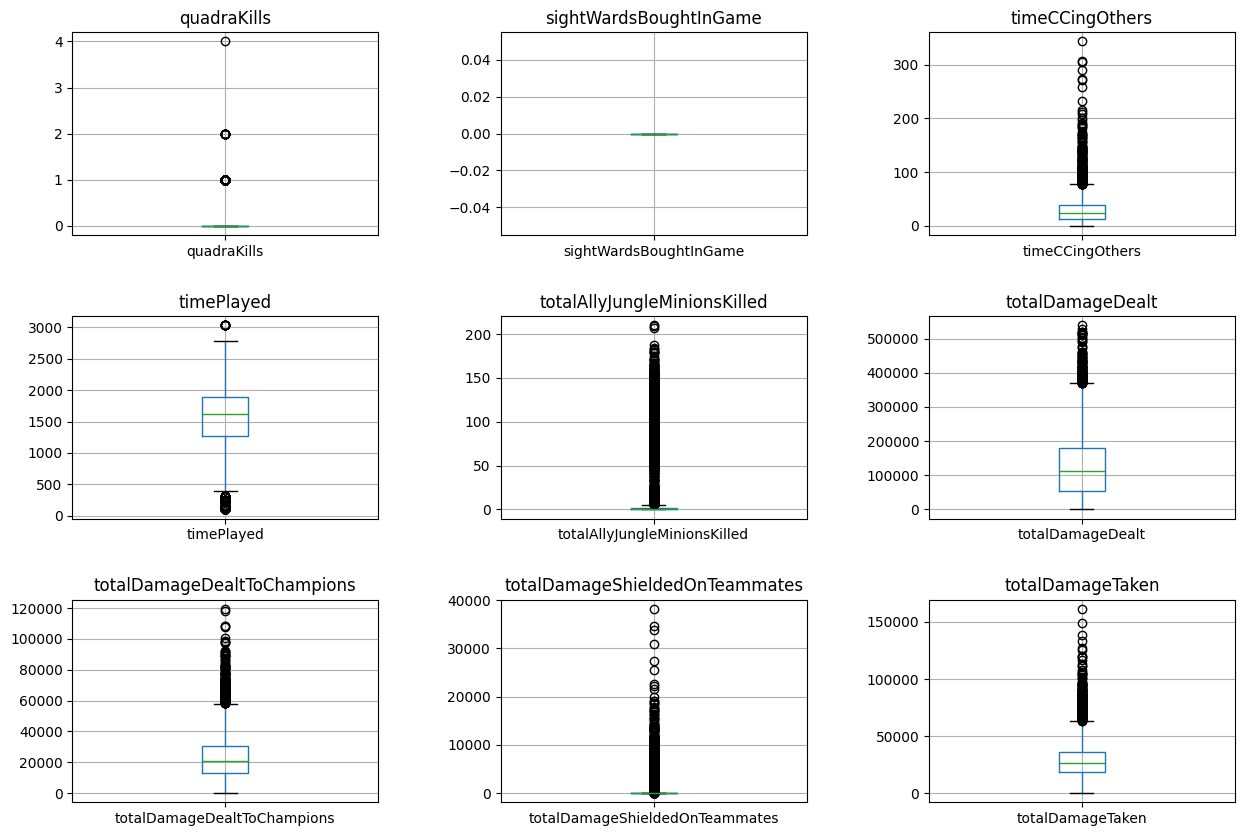

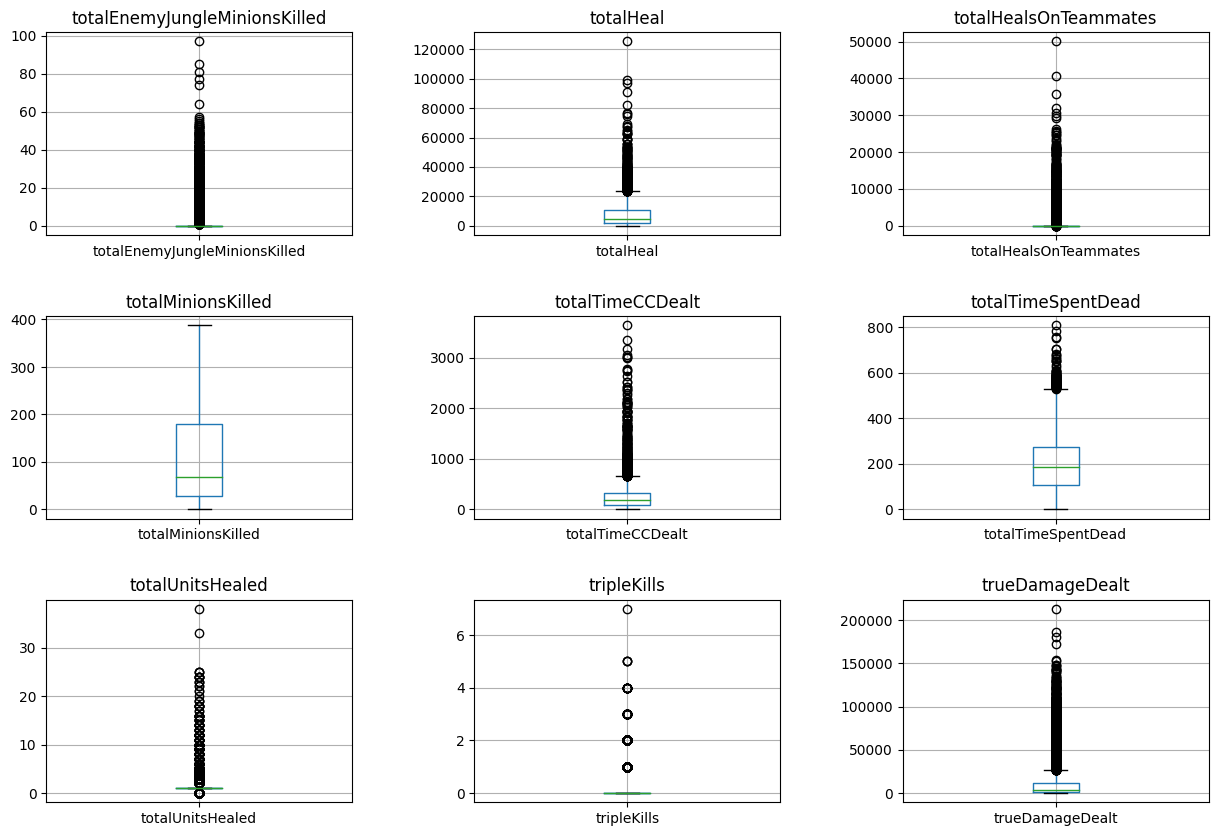

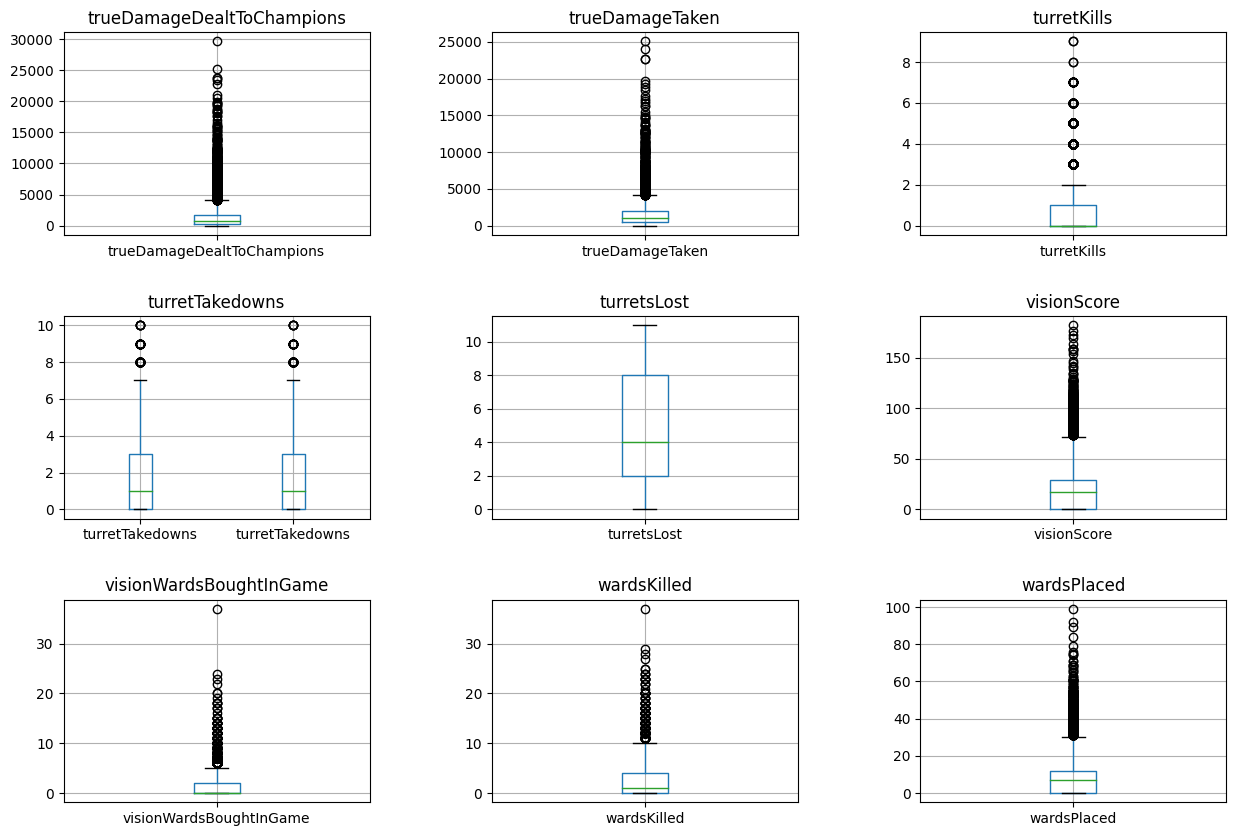

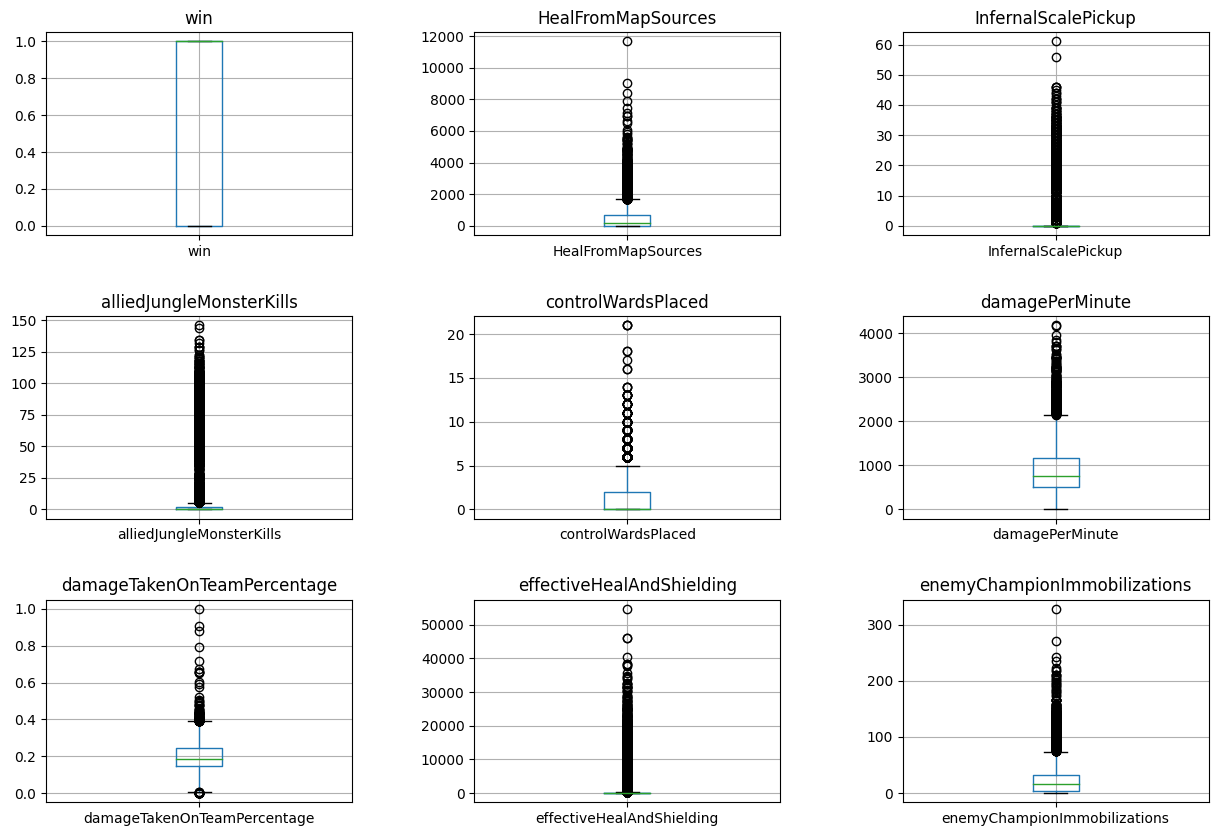

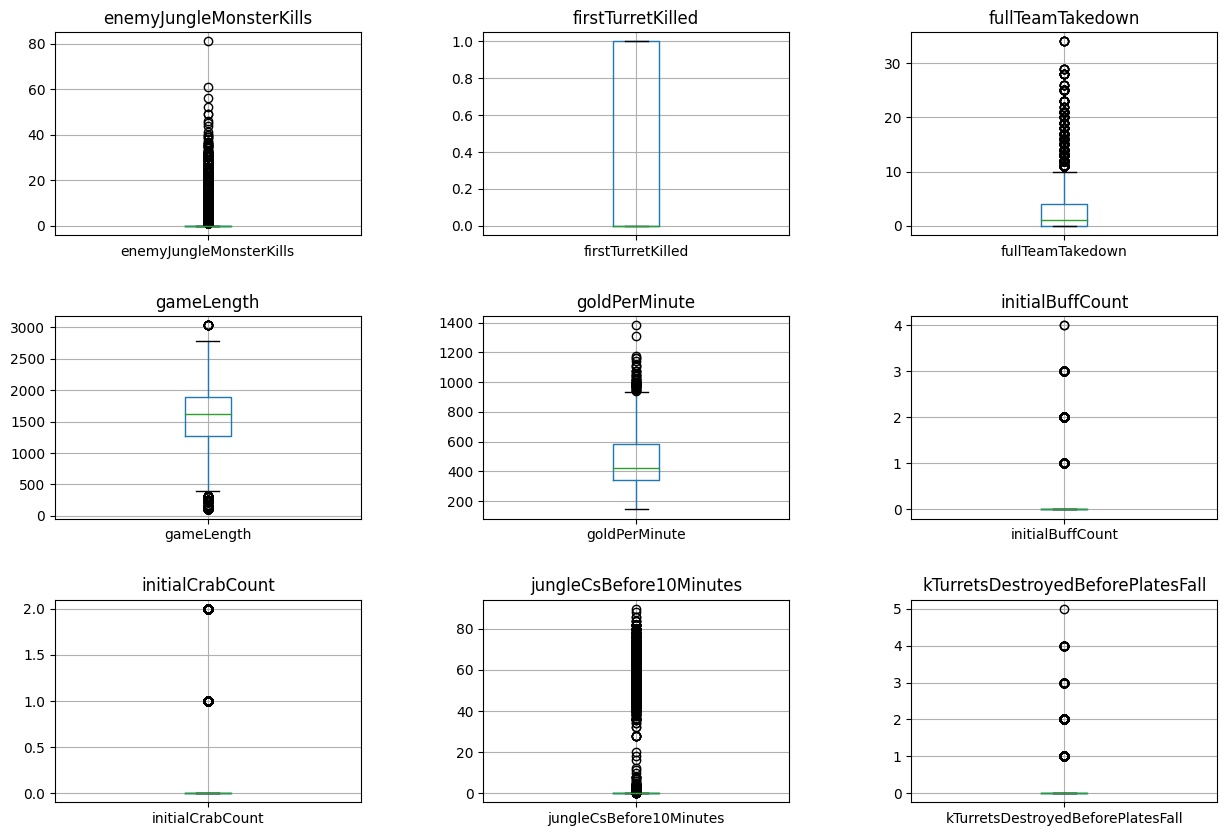

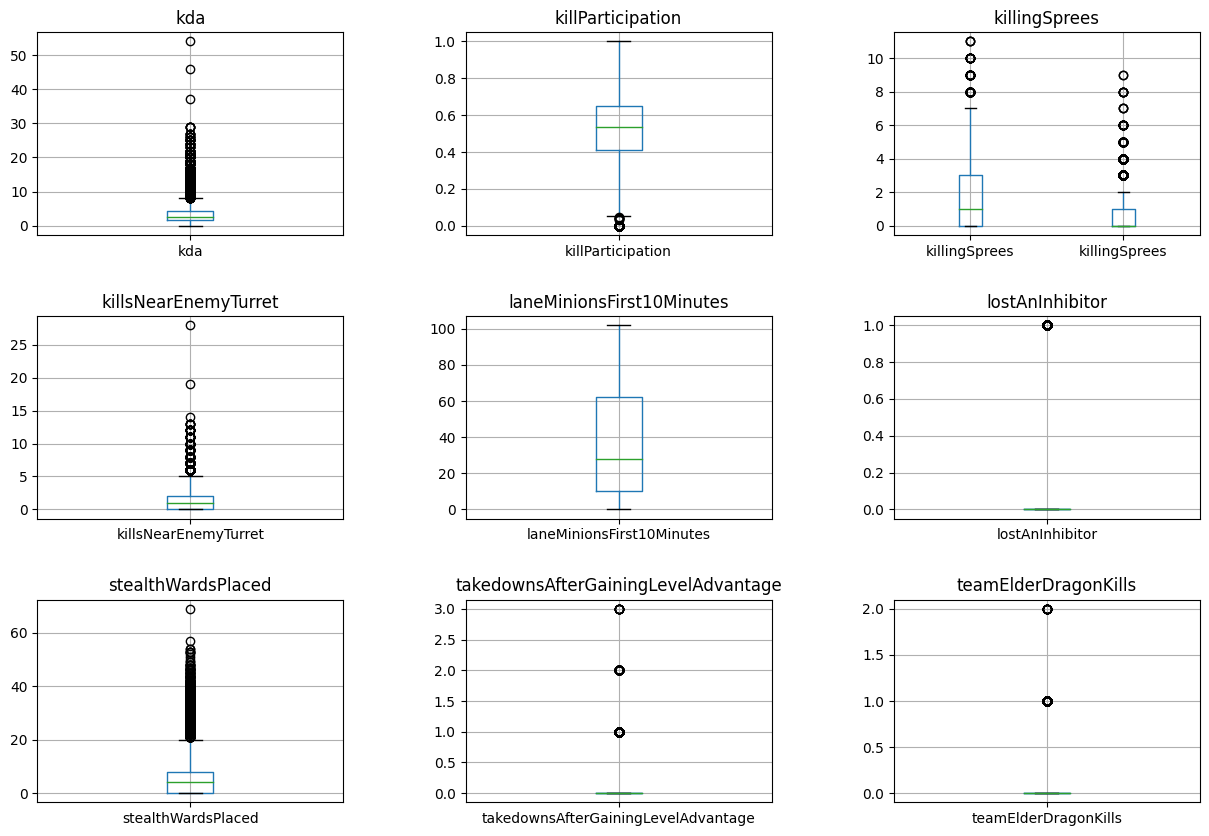

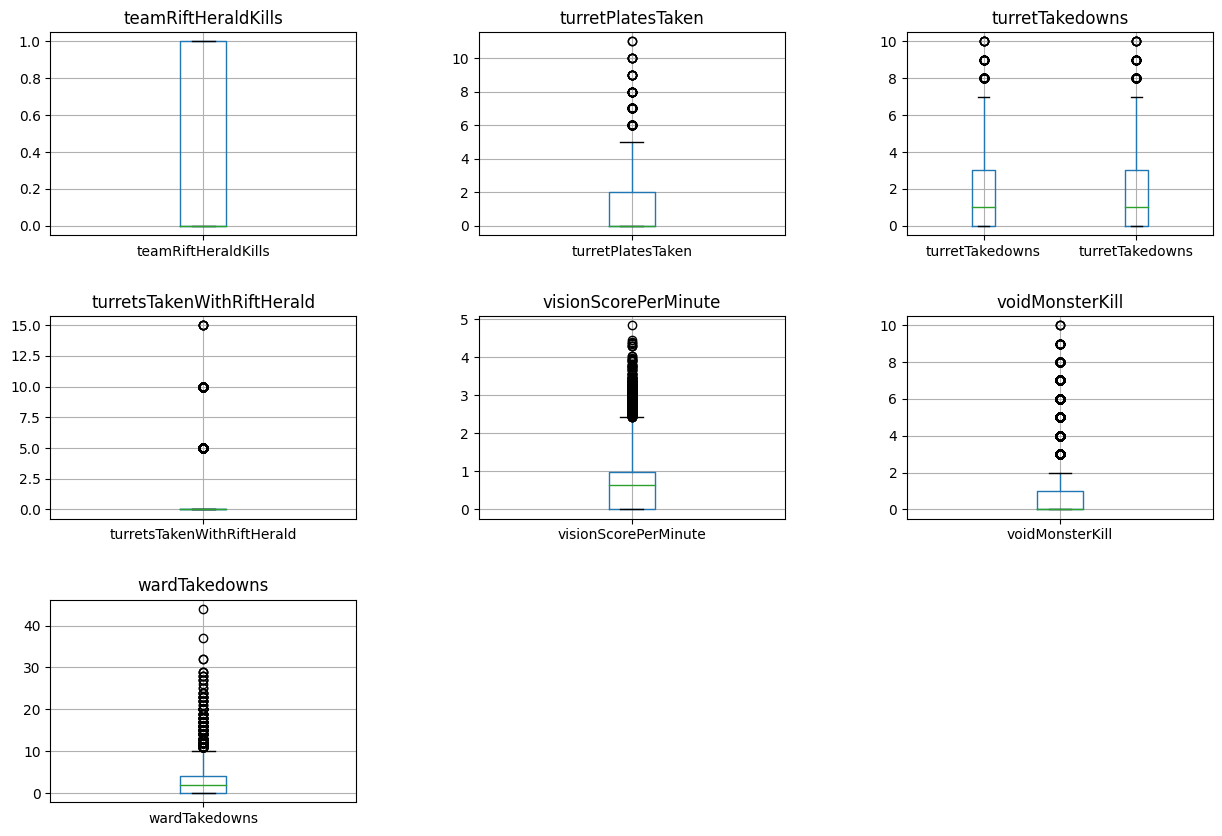

In [14]:
numeric_df = game_stats_df.select_dtypes(include=['number'])

num_columns = 3  
num_rows = 3     
num_total_cols = len(numeric_df.columns)


for i in range(0, num_total_cols, num_columns * num_rows):
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
    axes = axes.flatten()  

    for j, col in enumerate(numeric_df.columns[i:i + num_columns * num_rows]):
        numeric_df.boxplot(column=col, ax=axes[j])
        axes[j].set_title(col)

    for j in range(len(numeric_df.columns[i:i + num_columns * num_rows]), len(axes)):
        axes[j].axis('off')

    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()


These graphs allow me to obtain an insight on how is the information distributed. As a player myself, it also enables me to get a better grasp of how the game develops in this specific ELO. 